In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras import backend as K
from sklearn import metrics

In [4]:
LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = np.size(np.unique(y_train))
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(num_classes)

(60000, 28, 28, 1)
(60000, 10)
10


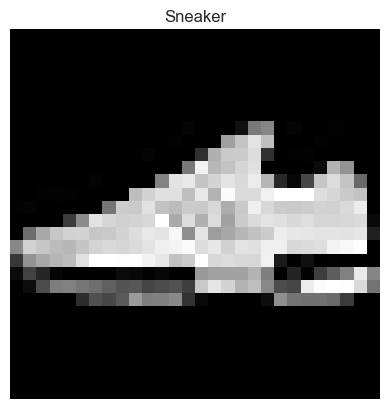

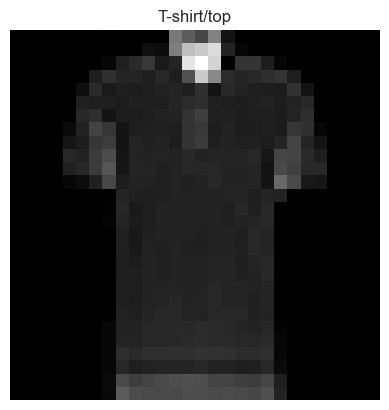

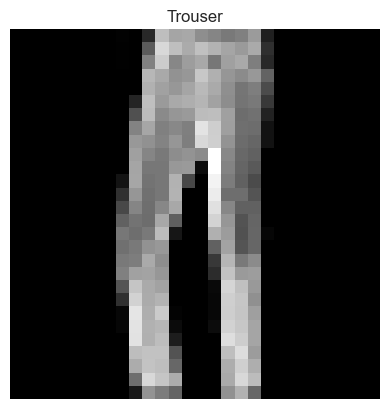

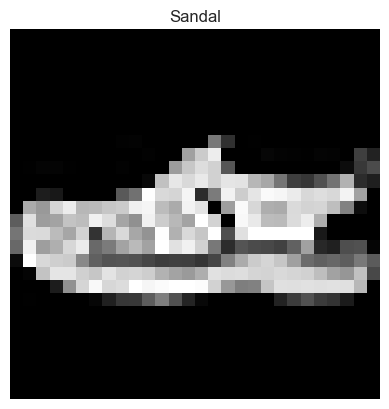

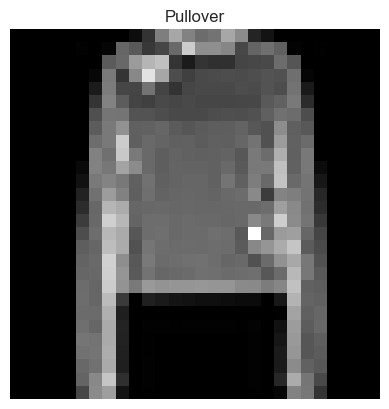

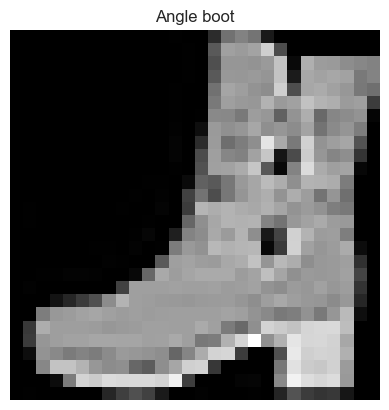

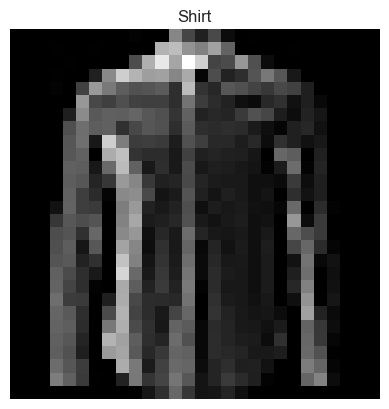

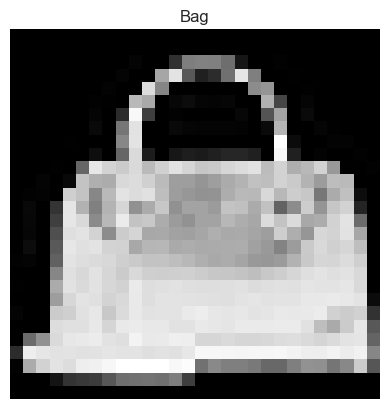

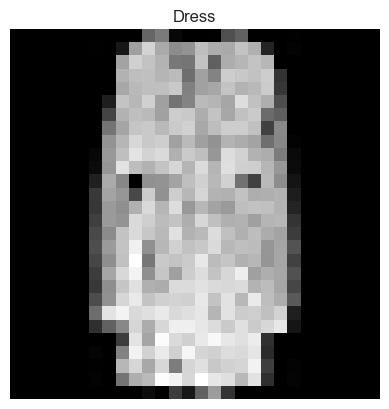

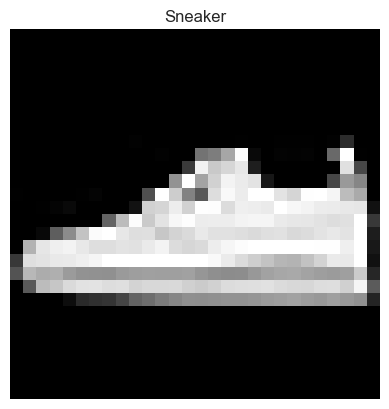

In [31]:
indices = np.random.choice(np.arange(x_train.shape[0]), 10, replace=False)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']
for i in indices:

    plt.imshow(x_train[i], cmap='gray')
    plt.title(classes[np.argmax(y_train[i])])
    plt.axis('off')
    plt.show()

In [18]:
model = models.Sequential()
model.add(Input(input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.30))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
epochs = 20
batch_size = 128
opt = optimizers.Adam(0.001)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['acc'])

In [20]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (x_test, y_test),
          verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - acc: 0.6422 - loss: 1.0718 - val_acc: 0.7882 - val_loss: 0.6428
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - acc: 0.7733 - loss: 0.6931 - val_acc: 0.8179 - val_loss: 0.5492
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - acc: 0.8047 - loss: 0.6080 - val_acc: 0.8478 - val_loss: 0.4880
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - acc: 0.8234 - loss: 0.5607 - val_acc: 0.8548 - val_loss: 0.4544
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - acc: 0.8368 - loss: 0.5258 - val_acc: 0.8668 - val_loss: 0.4324
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - acc: 0.8452 - loss: 0.5029 - val_acc: 0.8723 - val_loss: 0.4135
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - acc: 0.8511 - loss: 0.4819 - val_acc: 0.8837 - val_loss: 0.3940
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - acc: 0.8559 - loss: 0.4621 - val_acc: 0.8837 - val_loss: 0.3823
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation loss: 0.32128143310546875
Validation accuracy: 0.9014999866485596


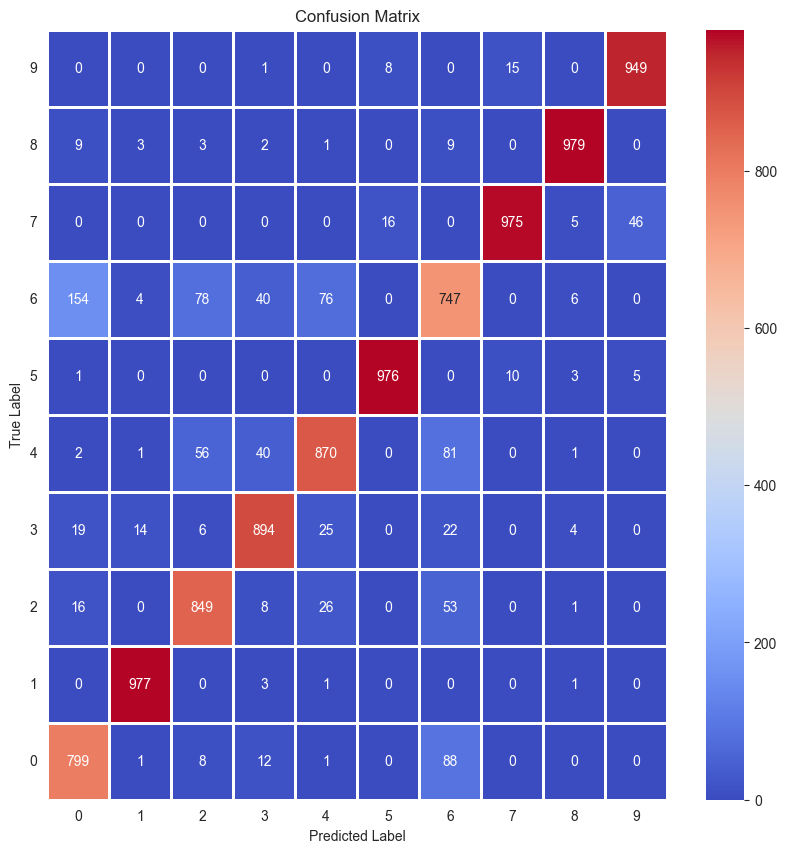

In [23]:
max_pred_y = np.argmax(y_pred, axis=1)
max_test_y = np.argmax(y_test, axis=1)
show_confusion_matrix(max_pred_y, max_test_y, num_classes)

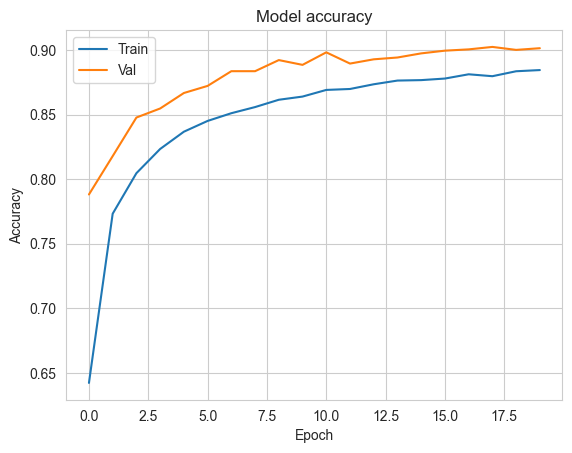

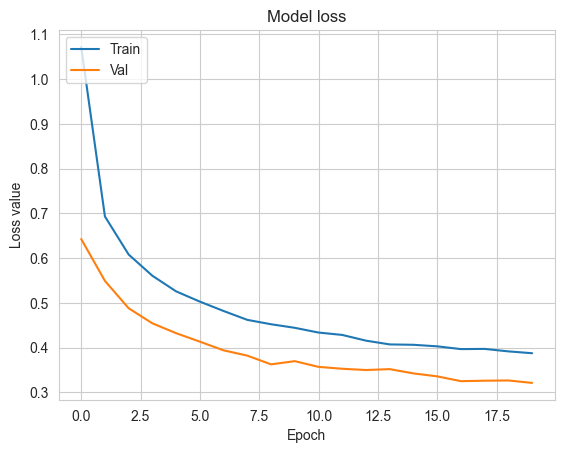

In [25]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()